<a href="https://colab.research.google.com/github/PrincyPaliwal/Bert_sentimental_analysis-/blob/main/sentimental_analysis_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fake-useragent

In [ ]:
!nvidia-smi

Wed Nov 13 05:09:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import requests
import random
import time
from fake_useragent import UserAgent

class WebScraper:
    def __init__(self):
        # Initialize user-agent and proxy (if needed)
        self.ua = UserAgent().random
        self.proxy = {}  # Add your proxy if necessary, else leave empty

    def request_wrapper(self, url):
        headers = {
            'User-Agent': self.ua,
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'Accept-Language': 'en-US,en;q=0.9,la;q=0.8',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1',
            'Cache-Control': 'max-age=0',
        }

        retries = 5  # Number of retries
        for attempt in range(retries):
            try:
                # Make the request with headers and proxy
                response = requests.get(url, headers=headers, proxies=self.proxy, timeout=10, verify=False)
                if response.status_code == 200:
                    print(f"Success: {url}")
                    return response.text  # Return the HTML content of the page
                else:
                    print(f"Attempt {attempt + 1}: Received status code {response.status_code}")
            except requests.exceptions.RequestException as e:
                print(f"Attempt {attempt + 1}: Error fetching the URL: {e}")
                time.sleep(random.randint(1, 3))  # Random delay between retries

        print("Max retries reached, request failed.")
        return None  # Return None if failed after retries

    def scrape(self, url):
        print(f"Starting to scrape: {url}")
        page_content = self.request_wrapper(url)
        if page_content:
            # Process the page content, e.g., parsing HTML, extracting data
            print(f"Scraping successful for {url}")
            # You can add logic to parse the content here, for example:
            # soup = BeautifulSoup(page_content, 'html.parser')
            return page_content
        else:
            print(f"Failed to scrape {url}")
            return None

# Example usage:
if __name__ == "__main__":
    scraper = WebScraper()
    url = "https://www.amazon.com/dp/B07DSZ3RQB"  # Replace with your target URL
    scraper.scrape(url)


Starting to scrape: https://www.amazon.com/dp/B07DSZ3RQB
Success: https://www.amazon.com/dp/B07DSZ3RQB
Scraping successful for https://www.amazon.com/dp/B07DSZ3RQB


In [ ]:
!pip install langdetect  # Install the missing module
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
from langdetect import detect  # Now the module should be found
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {'not'}
from wordcloud import WordCloud
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=b9f076d726f925babb028ed65756b626b0e0c1f28c7d9baaad921e87be39dfaa
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
!pip install vaderSentiment # Install the missing module, vaderSentiment
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
from langdetect import detect  # Now the module should be found
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # Import SentimentIntensityAnalyzer from vaderSentiment module
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {'not'}
from wordcloud import WordCloud
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install langdetect
!pip install wordcloud

In [ ]:
prediction_reviews=pd.read_csv('amazon_review_file.csv')

In [ ]:
prediction_reviews.head(2)

,Date Info,Country Info,Name,Review Title,Content,Rating,Link,Product Title
0,"October 3, 2021",Reviewed in the United States,Lifeon2wheels,5.0 out of 5 stars,Update! After 90 days of life with this machin...,5.0 out of 5 stars,/Tchibo-Single-Serve-Coffee-Built/dp/B0BZTJQQT...,Tchibo Single Serve Coffee Maker - Automatic E...
1,"November 13, 2023",Reviewed in the United States,knotpc,5.0 out of 5 stars,We purchased this coffee maker in January of 2...,5.0 out of 5 stars,/Tchibo-Single-Serve-Coffee-Built/dp/B0BZTJQQT...,Tchibo Single Serve Coffee Maker - Automatic E...


In [ ]:
prediction_reviews=prediction_reviews[['Rating','Content']]

In [ ]:
# Add a new column 'Language' with the detected language
prediction_reviews['Language'] = prediction_reviews['Content'].apply(lambda x: detect(x) if pd.notnull(x) else None)
prediction_reviews = prediction_reviews[prediction_reviews['Language'] == 'en']
prediction_reviews = prediction_reviews.drop(columns=['Language'])
prediction_reviews = prediction_reviews.reset_index(drop=True)

In [ ]:
prediction_reviews = prediction_reviews.dropna()
prediction_reviews = prediction_reviews.drop_duplicates()
prediction_reviews = prediction_reviews.reset_index(drop=True)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load a pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Example of a commonly used pre-trained tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')  # Example of a commonly used pre-trained model


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
original_labels = [
    'Adaptability', 'Durability', 'Ease of Use', 'Ergonomics',
    'Interference', 'Performance', 'Use Efficiency', 'Aesthetics',
    'Ease of Reprocessing', 'Ease of Storage', 'Price', 'Safety'
]

# Map labels to numerical values (0 to 12)
labeling_dict = {label: idx for idx, label in enumerate(original_labels)}

In [ ]:
def predict_aspect(text):
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    output = model(**encoded_input)
    logits = output.logits.detach().cpu().numpy()
    y_pred = np.argmax(logits, axis=-1)
    given_value = y_pred[0] # Predic the Aspect based on Review
    result_key = next(key for key, value in labeling_dict.items() if value == given_value) # GIve the actual aspect after model gives use numerical value
    return result_key # return the results in string (text) Form

# Apply the predict_aspect function to the 'Content' column one by one
prediction_reviews['Predicted_Aspect'] = prediction_reviews['Content'].apply(predict_aspect)

In [ ]:
prediction_reviews.head(2)

,Rating,Content,Predicted_Aspect
0,5.0 out of 5 stars,Update! After 90 days of life with this machin...,Durability
1,5.0 out of 5 stars,We purchased this coffee maker in January of 2...,Durability


In [ ]:
def cleaning_text(sentence) :
    sentence = re.sub(r'http\S+\s*|\W+|#\S+|[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]|\s+|[0-9]', ' ', sentence.lower())
    return sentence

In [ ]:
def tokenization_lemmatize_stopwording(sentence):
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(sentence) if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Function to print sentiments of the sentence.
def sentiment_scores(sentence):
    cleaned_sentence = tokenization_lemmatize_stopwording(cleaning_text(sentence))
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(cleaned_sentence)

    sentiment_score = sentiment_dict['compound']

    if sentiment_score >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_score <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    return sentiment_label, sentiment_score

In [ ]:
# Function to get the most common words in a sentence
def get_most_common_words(sentence, num_words=2):
    sentence=tokenization_lemmatize_stopwording(cleaning_text(sentence))
    words = word_tokenize(sentence.lower())
    freq_dist = FreqDist(words)
    most_common_words = [word for word, _ in freq_dist.most_common(num_words)]
    return most_common_words

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
prediction_reviews[['Sentiment_Label', 'Sentiment_Score']] = prediction_reviews['Content'].apply(sentiment_scores).apply(pd.Series)
prediction_reviews["Common_Words"] = prediction_reviews['Content'].apply(lambda x: ", ".join(get_most_common_words(x,3)))

In [ ]:
prediction_reviews.head(2)

,Rating,Content,Predicted_Aspect,Sentiment_Label,Sentiment_Score,Common_Words
0,5.0 out of 5 stars,Update! After 90 days of life with this machin...,Durability,Positive,0.9996,"machine, coffee, bean"
1,5.0 out of 5 stars,We purchased this coffee maker in January of 2...,Durability,Positive,0.6987,"coffee, unit, support"


In [ ]:
# Assuming 'prediction_reviews' is the DataFrame you want to save
prediction_reviews.to_csv('store_prediction.csv', index=False)

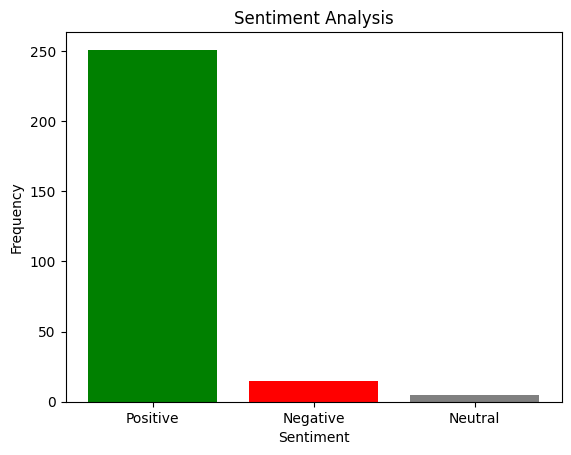

In [ ]:
# Assuming you already have a DataFrame named 'amazon_reviews_data' with 'Sentiment_Label' column
# Create a bar chart
sentiment_counts = prediction_reviews['Sentiment_Label'].value_counts()

# Plot the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')

# Show the plot
plt.show()

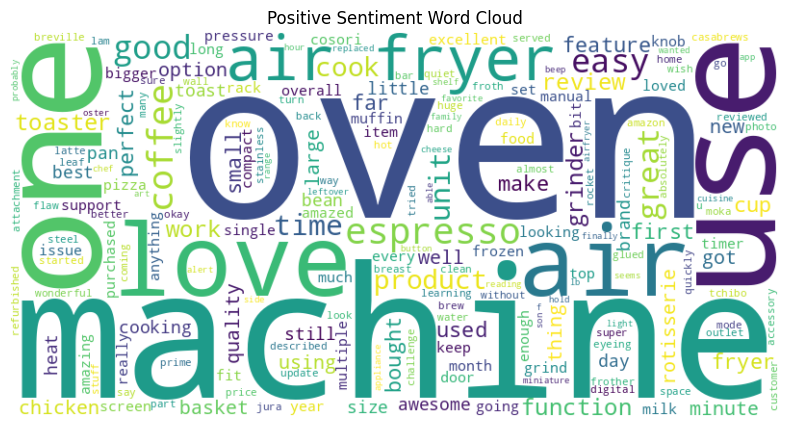

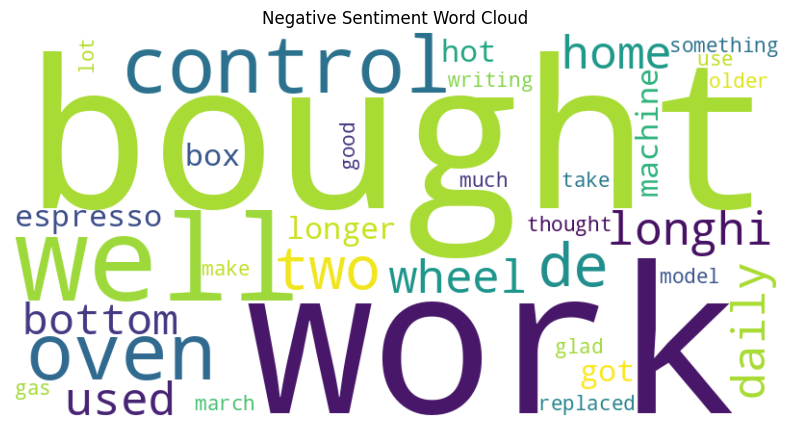

In [ ]:
# Assuming you have a DataFrame named 'amazon_reviews_data' with a 'Sentiment_Label' column and a 'Common Words' column

# Function to generate word cloud
def generate_wordcloud(sentiment_label):
    # Filter data for the specific sentiment
    sentiment_data = prediction_reviews[prediction_reviews['Sentiment_Label'] == sentiment_label]

    # Concatenate all common words for the sentiment
    all_words = ' '.join(sentiment_data['Common_Words'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment_label} Sentiment Word Cloud')
    plt.show()

# Generate word cloud for Positive sentiment
generate_wordcloud('Positive')

# Generate word cloud for Negative sentiment
generate_wordcloud('Negative')

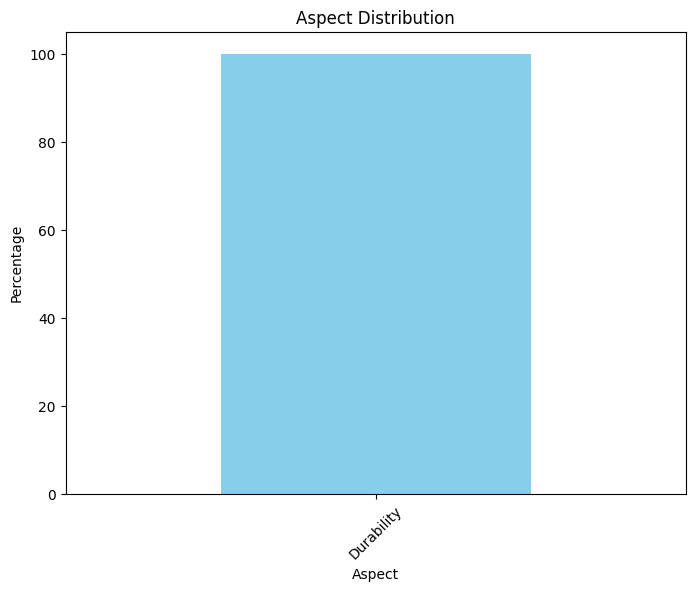

In [ ]:
# Calculate percentage of each aspect
aspect_percentage = prediction_reviews['Predicted_Aspect'].value_counts(normalize=True) * 100

# Plot the aspect percentages
plt.figure(figsize=(8, 6))
aspect_percentage.plot(kind='bar', color='skyblue')
plt.title('Aspect Distribution')
plt.xlabel('Aspect')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Install necessary libraries
!pip install -q torch
!pip install -U -q accelerate transformers

import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer

# Upload and read the CSV files
from google.colab import files
uploaded = files.upload()  # Use this to upload CSV files

# Replace 'Training_Data.csv' and 'Testing_Data.csv' with the names of your uploaded files
training_data = pd.read_csv('testing_data_20.csv')
testing_data = pd.read_csv('training_data_80.csv')

# Remove duplicates and NaN values
training_data = training_data.drop_duplicates(subset=['Review']).dropna()
testing_data = testing_data.drop_duplicates(subset=['Review']).dropna()

# Define labels and map them to numeric values
original_labels = [
    'Adaptability', 'Durability', 'Ease of Use', 'Ergonomics', 'Interference',
    'Performance', 'Use Efficiency', 'Aesthetics', 'Ease of Reprocessing',
    'Ease of Storage', 'Price', 'Safety'
]
labeling_dict = {label: idx for idx, label in enumerate(original_labels)}
training_data['Aspect'] = training_data['Aspect'].map(labeling_dict)
testing_data['Aspect'] = testing_data['Aspect'].map(labeling_dict)

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=len(original_labels))

# Tokenize the data
X_train = training_data['Review'].tolist()
X_test = testing_data['Review'].tolist()
y_train = training_data['Aspect'].tolist()
y_test = testing_data['Aspect'].tolist()
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset(X_train_tokenized, y_train)
test_dataset = Dataset(X_test_tokenized, y_test)

# Define metrics function
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        'accuracy': accuracy_score(p.label_ids, preds),
        'precision': precision_score(p.label_ids, preds, average='weighted'),
        'recall': recall_score(p.label_ids, preds, average='weighted'),
        'f1': f1_score(p.label_ids, preds, average='weighted')
    }

# Training arguments and trainer setup
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train and evaluate the model
trainer.train()
eval_results = trainer.evaluate()

print("Evaluation results:", eval_results)

# Save the model and tokenizer (optional)
model.save_pretrained('./model')
tokenizer.save_pretrained('./tokenizer')


Saving training_data_80.csv to training_data_80 (1).csv


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: